# Matplotlib- plt vs ax

Here's a very quick run down of the ways to make a matplotlib plot. First we'll make some data, and then use the basic plt interface

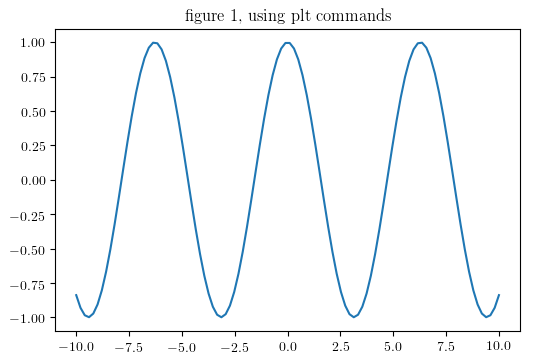

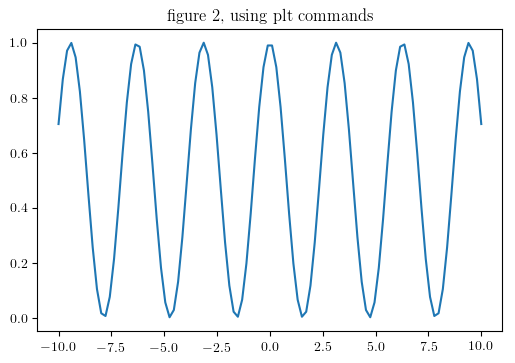

In [65]:
#import everything
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 

#data
x=np.linspace(-10, 10, 100)
y=np.cos(x)
y_error=0.2+0.5*np.random.randn(len(x))


#using plt to make two separate figures
plt.figure(1)
plt.plot(x, y)

#call plt.figure again to move to a separate graph
plt.figure(2)
plt.plot(x, y**2)

#Go back to the first plot to give it a title
plt.figure(1)
plt.title('figure 1, using plt commands')

#And now switch back to Figure 2
plt.figure(2)
plt.title('figure 2, using plt commands')

plt.show()


A slightly more advanced way of doing this is to refer to each axis via the 'object orientated' approach. Here we make a figure, and then add an axis to this figure. We can then plot directly onto this named axis. The plt.plot commands we used above are a simple wrapper around this process- under the hood, matplotlib works with axes objects. 

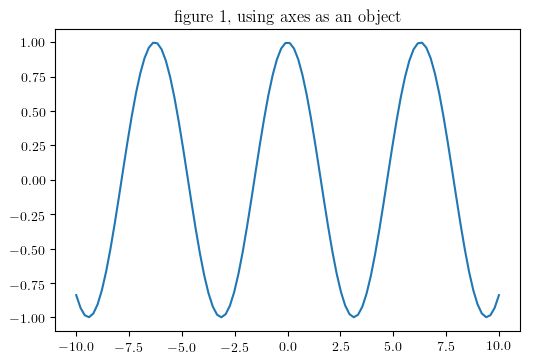

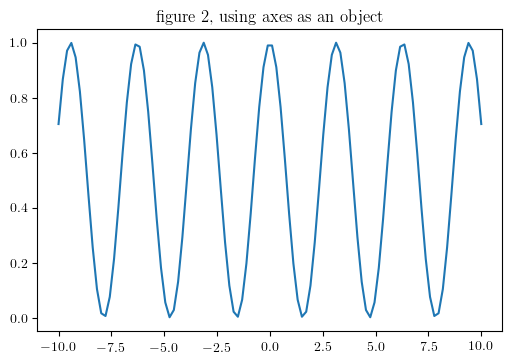

In [66]:
#Make a figure, and save it to a variable
fig1=plt.figure()
#Add an axis to this figure
#This means we want 1 plot in total, and we want to work with the first row and first column
ax1=fig1.add_subplot(1,1,1) #Don't require the commas- can also say fig1.add_subplot(111)

#A handy way to do this in one step is:
fig2, ax2=plt.subplots()

#Now, to plot things, access these axes straight away
ax1.plot(x, y)
ax2.plot(x, y**2)

#Note the difference in syntax! Using axes like this requires us to call 'set_title' rather than 'title'
ax1.set_title('figure 1, using axes as an object')
ax2.set_title('figure 2, using axes as an object')

#Most syntax to do with setting titles and labels is exactly the same between the plt and axes interfaces, 
#you just have to remember to add 'set_' in front of it!

plt.show()

# Below are a series of tips and interesting functions

## Markers and changing the linewidth around points

Notice the (very annoying) different syntax for plot, scatter and errorbar. Also not the different values you have to pass to 'size' to get markers which appear roughly the same size!

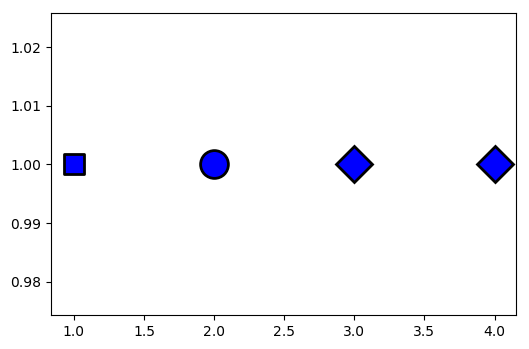

In [12]:
plt.figure()
plt.scatter(x=1, y=1, c='b', marker='s', s=200, linewidth=2.0, edgecolor='k')
plt.errorbar(x=2, y=1, c='b', marker='o', ms=20, markeredgewidth=2.0, markeredgecolor='k')
#mew is 'markeredgewidth', mec is 'markeredgecolor', ms is 'markersize'
plt.plot([3, 4], [1, 1] , c='b', linestyle='', marker='D', ms=18, mew=2.0, mec='k')

## Drawing line across the entire axis

You can use axvline and axhline to draw a line across the entire x-axis or y-axis range, which will also update when you zoom out of a plot. I think they only accept one value of x or y, however, so you'd need a for loop to draw multiple lines.

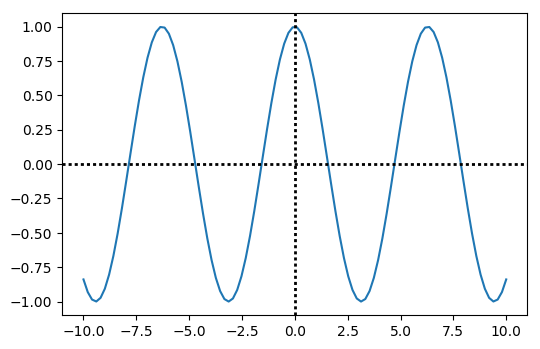

In [17]:
plt.figure()
plt.plot(x, y)
plt.axvline(x=0.0, c='k', linewidth=2.0, linestyle='dotted')
plt.axhline(y=0.0, c='k', linewidth=2.0, linestyle='dotted')

## Fill Between

Easily shade sections of your plot. Note that the colour is changed by 'facecolor', not just 'color. 'alpha' sets the transparency of the region.

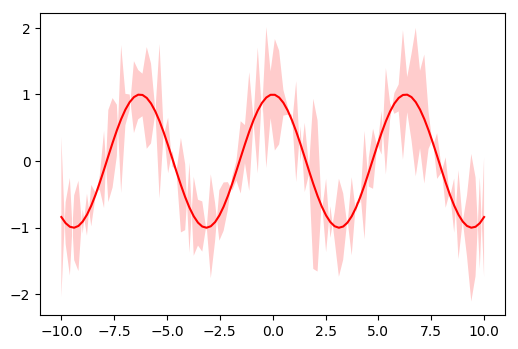

In [19]:
plt.figure()
plt.plot(x, y, c='r')
plt.fill_between(x, y+y_error, y-y_error, facecolor='r', alpha=0.2)

## Playing with Zorder

'zorder' sets the order things are plotted in. Things with a larger Zorder are plotted later.
Lines are plotted after points by default, even if points are called later. For example, compare this:

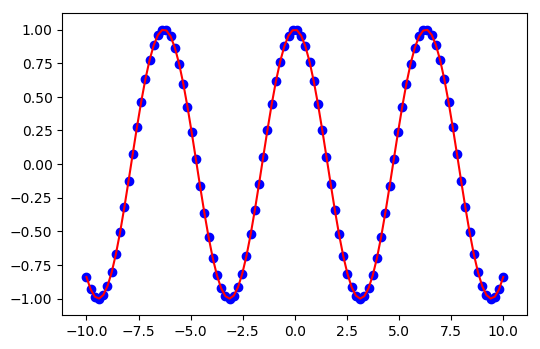

In [23]:
plt.figure()
plt.plot(x, y, c='r')
plt.scatter(x, y, c='b')
#see the points appear behind the line, even though we plot the points after we plot the line


to this:

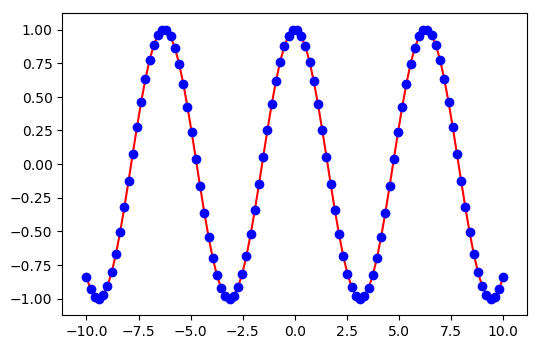

In [24]:
plt.figure()
plt.plot(x, y, c='r', zorder=0)
plt.scatter(x, y, c='b', zorder=1)

## Colour points in scatter by a third variable
We can set the colour of points in a scatter plot to reflect a third variable.

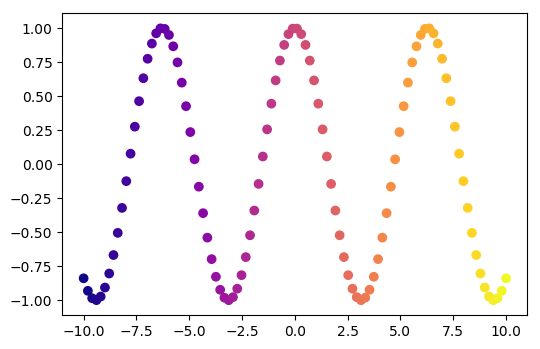

In [28]:
plt.figure()
z_values=np.linspace(0, 10, 100)
plt.scatter(x, y, c=z_values, cmap='plasma')

This is tricker to do with plt.errorbar, however! The following code doesn't work, I think because of the fact that errorbar is based (under the hood) on plt.plot, rather than plt.scatter. 

AttributeError: Unknown property cmap

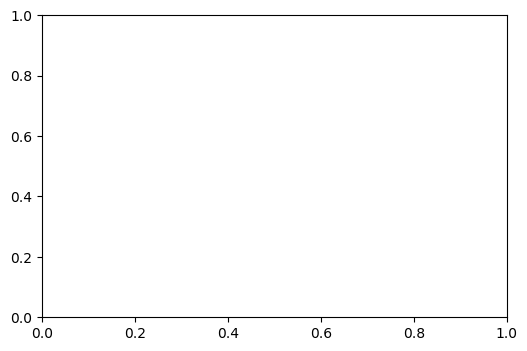

In [30]:
#This is tricker with errorbar!
plt.figure()
z=np.linspace(0, 10, 100)

#This doesn't work!
plt.errorbar(x, y, yerr=y_error, c=z_values, cmap='plasma')


To get around this, I normally call plt.scatter and then plt.errorbar with no marker.

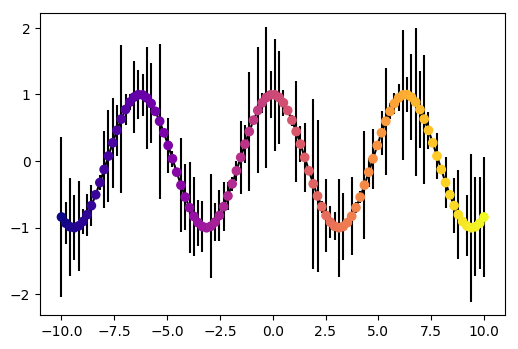

In [33]:
plt.scatter(x, y, c=z, cmap='plasma', zorder=10)
plt.errorbar(x, y, yerr=y_error, c='k', marker='', zorder=0)
plt.show()

Making the above plot with error bar colours which match the points is surprisingly difficult! If the number of points isn't too large, we can use a for loop:

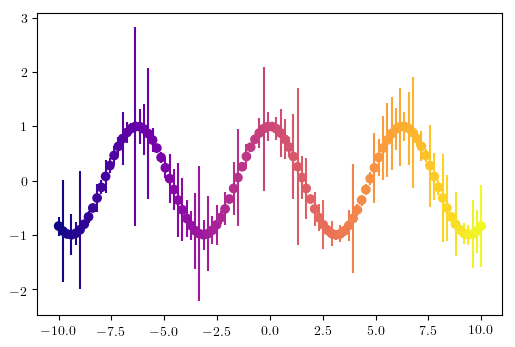

In [56]:
plt.figure()

#Assign the colourmap to a variable, for simplicity
cm=plt.get_cmap('plasma')
plt.scatter(x, y, c=z_values, cmap=cm, zorder=10)

#Loop through the x, y, y error and z values
for i, (xval, yval, y_error_val, zval) in enumerate(zip(x, y, y_error, z)):
    #Get the colour from the colourmap like  this (number should be between 0 and 1)
    colour=cm(1.0*zval/np.max(z))
    # colour=cm(1.0*i/len(x)) gives the same result
    
    #plot a single point at a time
    plt.errorbar(xval, yval, yerr=y_error_val, linestyle='', c=colour)

plt.show()

## Ticks, labels and LaTeX

I prefer plots that are going to be published to use LaTeX fonts, and it's important to make sure that your tick labels and such are readable!

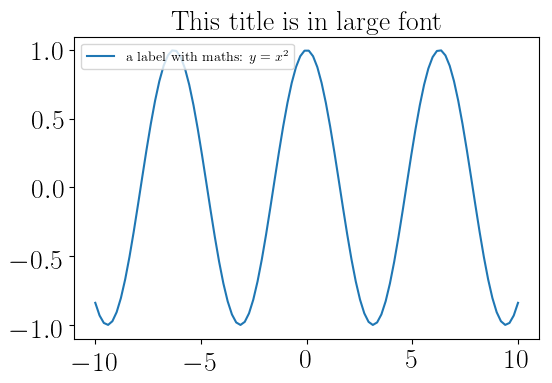

In [39]:
#To use LaTeX in a plot, add these lines to the top of your file
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fig, ax=plt.subplots()

ax.plot(x, y, label='a label with maths: $y=x^{{2}}$')


#Change the tick size
ax.tick_params(which='both', labelsize=20)

#Most calls to text objects allow you to set fontsize too, e.g
ax.set_title('This title is in large font', fontsize=20)

#legend allows you to do that too
ax.legend(loc= 'upper left', fontsize=10)

plt.show()

Note the syntax here! If you were typing in LaTeX, you'd write `$y=x^{2}$`. But if you try to write
```python
label='$y=x^{2}$'
``` 
you'll get an error! Python string formatting uses curly braces too. We have to escape the curly braces with a second pair of braces, meaning our label should be 

```python
label="$y=x^{{2}}$"
``` 




## Two Legends

Having two separate legends is a bit tricky too- calling ax.legend() multiple times will only ever result in one legend. You have to save the output of a call to plot, then call the legend with a list of lines and manually add it to the figure.

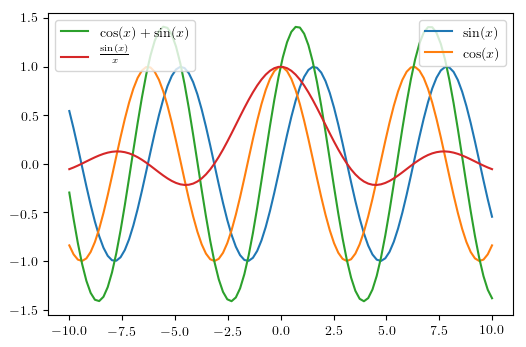

In [42]:
x=np.linspace(-10, 10, 100)
y1=np.sin(x)
y2=np.cos(x)
y3=np.cos(x)+np.sin(x)
y4=np.sin(x)/x

fig, ax=plt.subplots()
#Save the output of ax.plot to a variable.
#we need the comma here because ax.plot returns things as a list. 
#Without the comma, line1 would be [<matplotlib.lines.Line2D at 0x7f314c7f9710>], whereas we want it to just be 
#<matplotlib.lines.Line2D at 0x7f314c7f9710>
line1, =ax.plot(x, y1, label='$\sin(x)$')
line2, =ax.plot(x, y2, label='$\cos(x)$')
line3, =ax.plot(x, y3, label='$\cos(x)+\sin(x)$')
line4, =ax.plot(x, y4, label='$\\frac{{\sin(x)}}{{x}}$')

legend_1=ax.legend(handles=[line1, line2], loc='upper right')

#Manually add your legend to the plot
ax.add_artist(legend_1)

#Can now call a second legend which won't overwrite the first
legend2=ax.legend(handles=[line3, line4], loc='upper left')

plt.show()


## Subplots and Gridspec

It's easy to make simple subplots on one figure

Axs is of type <type 'numpy.ndarray'>
Axs is of shape (2,)


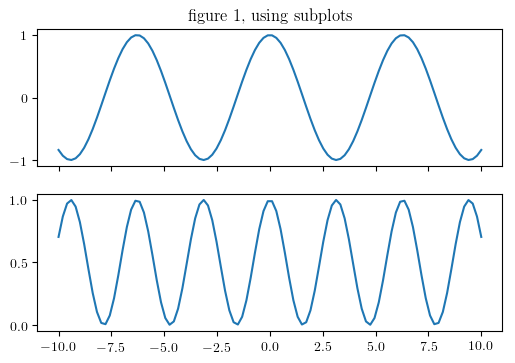

In [48]:
#Subplots
fig, axs=plt.subplots(nrows=2, ncols=1, sharex=True)

#We can see now that axs is a numpy array with 2 elements
#And we've made the two plots share the same x axis

print "Axs is of type {}".format(type(axs))
print "Axs is of shape {}".format(axs.shape)

axs[0].plot(x, y)
axs[1].plot(x, y**2)

axs[0].set_title('figure 1, using subplots')

plt.show()



We can also make (N x M) shape subplots. It's easy to loop through this 2D array if we use the 'flatten()' attribute

twoD_axs is of shape (2, 2)


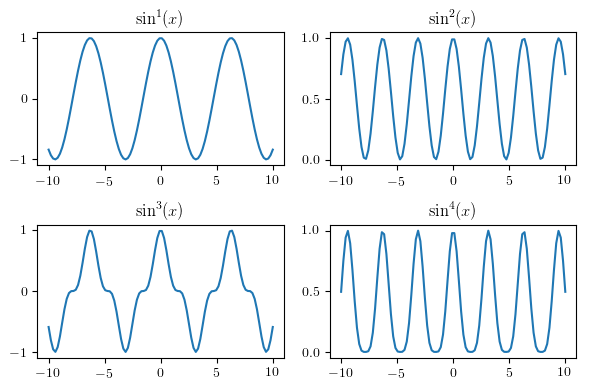

In [50]:
#Subplots with many columns
fig, twoD_axs=plt.subplots(nrows=2, ncols=2)

#Axs is now a 2D numpy array
print "twoD_axs is of shape {}".format(twoD_axs.shape)

#Using a for loop to loop through axes:
for i, ax in enumerate(twoD_axs.flatten()):
    ax.plot(x, y**(i+1))
    ax.set_title('$\sin^{{{}}}(x)$'.format(i+1))


#Tries to fix the formatting
plt.tight_layout()
plt.show()

### Gridspec

Gridspec is a more complicated way to make subplots, but it's also more powerful. Here's an example of some of my code which has 8 subplots: a plot of 4 spectral fits, as well as a plot of 4 residuals around those fits which are plotted directly underneath. I use gridspec to fix the aspect ratio of the residual plots.

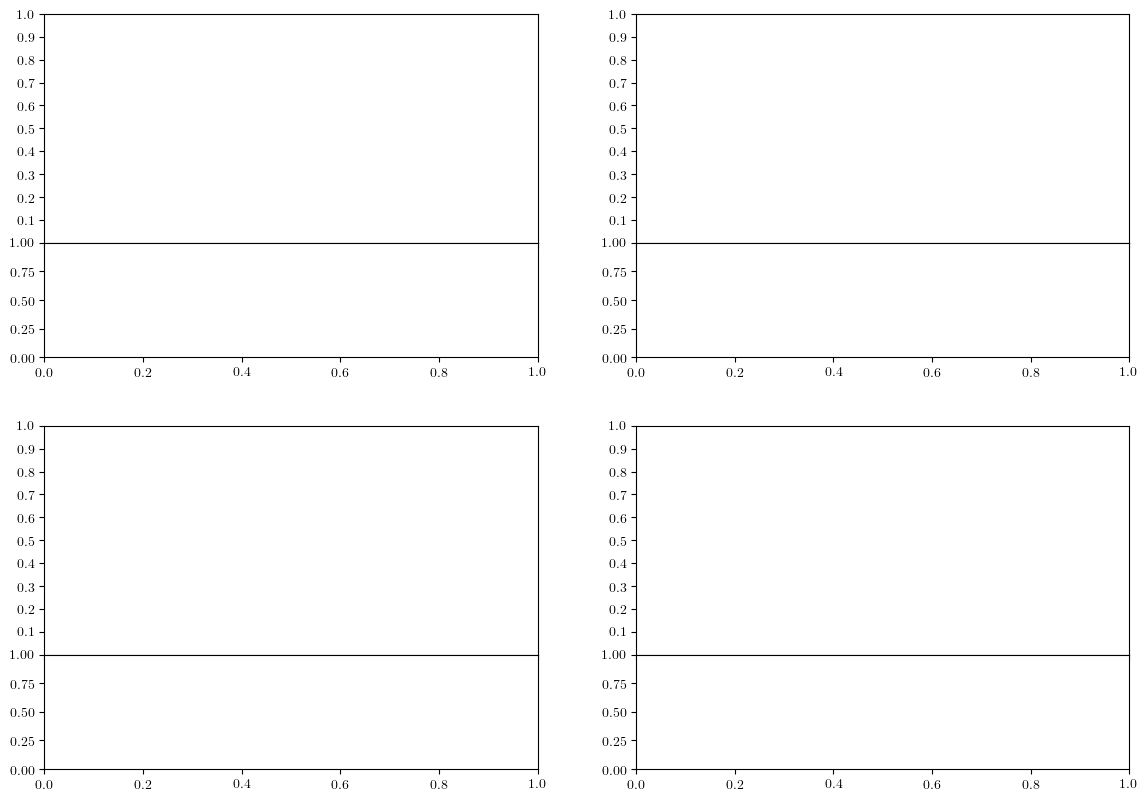

In [60]:
import matplotlib.pyplot as plt 
import matplotlib.gridspec as gridspec
import matplotlib.ticker as ticker   


fig=plt.figure(figsize=(14, 10))

#Empty array- we want 4 subplots, but each of those subplots has two sub-subplots
axs=np.empty((4, 2), dtype='object')

#We first make an outer grid, which is 2x2 
outer_grid=gridspec.GridSpec(2, 2)


#Now loop through the outer grid, make the two inner subplots each time and update our axes array
for i in range(4):
    #Gridspec allows you to set the height and width ratios here.
    #The tricky thing is 'subplot_spec', which isn't a very helpful name. That tells the inner 
    #axes where to be placed in the outer grid.
    inner_grid = gridspec.GridSpecFromSubplotSpec(2, 2, width_ratios=[1, 1], height_ratios=[2, 1]
                                                  , subplot_spec=outer_grid[i//2, i%2], hspace=0.0)
    #The i//2 and i%2 are just quick ways to get the numbers (0, 0), (0, 1), (1, 0), (1, 1)
    
    #We now need to add an actual subplot to our axes array, so we can then use it like normal
    axs[i, 0] = fig.add_subplot(inner_grid[0, :2])
    axs[i, 1] = fig.add_subplot(inner_grid[1, :2], sharex=axs[i, 0])
    
    #This turns off the x-tick labels of the large figure
    plt.setp(axs[i, 0].get_xticklabels(), visible=False)

    #Avoid the overlapping labels- this deletes the lowest label on an axis
    axs[i, 0].yaxis.set_major_locator(ticker.MaxNLocator(prune='lower'))
    

Which ends up with following plot

![](files/SpectralFit.png)

There's lots more examples on the matplotlib website. And if you get stuck, StackOverflow is the place to head to!